In [1]:
import numpy as np
import os
from datetime import date

from define_bait_layout import bait_list, plot_cache_map

import matplotlib.pyplot as plt

In [2]:
''' session params - update each time '''
bird_id = input("bird ID: ")

# for baiting sites
seed = input("random seed: ")
seed = np.array([seed]).astype(int)[0]

bird ID: test_2
random seed: 2303201


In [3]:
''' make session dir '''
root = "Z:/Isabel/data/acquisition/"

# get today's date
today_raw = date.today().isoformat()
today = f"{today_raw[2:4]}{today_raw[5:7]}{today_raw[8:]}"

# make dir
session_folder = f"{bird_id}_{today}/"
session_path = f"{root}{session_folder}"
if os.path.exists(session_path):
    print("warning, session folder already exists!")
else:
    os.mkdir(session_path)

In [4]:
''' determine sites to bait '''
to_bait = np.arange(8, 11)
rng = np.random.default_rng(seed=seed)
n_baits = rng.choice(to_bait)
baited_sites = bait_list(n_baits, seed)

# save the site numbers
baited_site_file = f"{session_path}baited_sites.txt"
np.savetxt(baited_site_file, baited_sites, fmt ='%.0f\n')

bait 10 sites: [ 2  3  4 48 51 64 70 74 81 82]


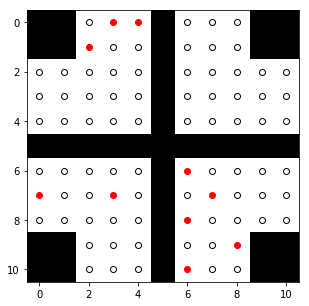

In [5]:
''' plot cache map w/ baits labeled '''
f, ax = plot_cache_map(baited_sites)
plt.show()
f.savefig(f'{session_path}site_map.png', dpi=600, bbox_inches='tight')